<a href="https://colab.research.google.com/github/serepina/Human_Detector_Comparison/blob/main/YOLOv3_Darknet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **개발환경 설정**

**Git에서 YOLOv4 다운로드**

In [1]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14665, done.
remote: Total 14665 (delta 0), reused 0 (delta 0), pack-reused 14665
Receiving objects: 100% (14665/14665), 13.23 MiB | 4.29 MiB/s, done.
Resolving deltas: 100% (9975/9975), done.


**다운받은 모델의 구동환경 옵션 설정**

In [2]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


**CUDA 버전 확인**

In [3]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


**make 명령어를 통해 YOLOv4 설치 완료**

In [4]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

# **학습된 모델 가중치 적용**

**미리 학습된 모델 가중치 다운**

In [27]:
!wget https://pjreddie.com/media/files/yolov3-tiny.weights

--2021-01-09 13:04:06--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M  6.21MB/s    in 21s     

2021-01-09 13:04:28 (1.59 MB/s) - ‘yolov3-tiny.weights’ saved [35434956/35434956]



In [5]:
#!wget https://pjreddie.com/media/files/yolov3.weights

--2021-01-09 12:31:22--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  3.58MB/s    in 81s     

2021-01-09 12:32:43 (2.94 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



# **필요 함수 작성**

**필요한 함수를 미리 작성해둠**

In [6]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

**테스트 실행**

darknet을 실행시키고, 그중 detector test를 실행시키며, 뒤로는 클래스명, 모델 설정, 모델 가중치, 그리고 테스트할 이미지 파일을 넣어주는 것

In [25]:
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights data/person.jpg -dont_show

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0,

In [28]:
#!./darknet detector test cfg/coco.data cfg/yolov3-tiny.cfg yolov3-tiny.weights data/person.jpg -dont_show

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 

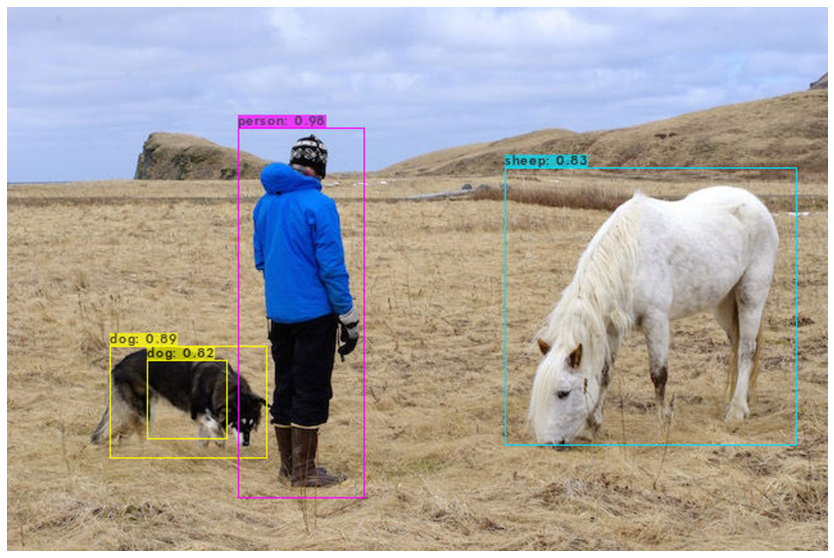

In [29]:
# show image using our helper function
imShow('predictions.jpg')

# **동영상 객체탐지**

**test.mp4 업로드**

In [17]:
# upload the video of your choosing! (Feel free to use the same video I do, it is in the Github repository)
upload()

Saving test3.mp4 to test3.mp4
saved file test3.mp4


**탐지기 실행**

In [34]:
!./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights test3.mp4 -dont_show -out_filename res.avi

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 cvWriteFrame 
Objects:

person: 100% 
person: 99% 
person: 99% 
person: 97% 
person: 97% 
person: 95% 
person: 78% 

FPS:42.0 	 AVG_FPS:40.2

 cvWriteFrame 
Objects:

person: 100% 
person: 99% 
person: 99% 
person: 98% 
person: 97% 
person: 96% 
person: 64% 
person: 32% 
person: 27% 

FPS:41.7 	 AVG_FPS:40.2

 cvWriteFrame 
Objects:

person: 100% 
person: 100% 
person: 99% 
person: 99% 
person: 98% 
person: 58% 
person: 34% 
person: 33% 

FPS:43.3 	 AVG_FPS:40.2

 cvWriteFrame 
Objects:

person: 100% 
person: 100% 
person: 99% 
person: 98% 
person: 81% 
person: 68% 
person: 39% 
person: 30% 

FPS:43.2 	 AVG_FPS:40.2

 cvWriteFrame 
Objects:

person: 100% 
person: 99% 
person: 99% 
person: 99% 
person: 90% 
person: 88% 
person: 64% 

FPS:44.4 	 AVG_FPS:40.2

 cvWriteFrame 
Objects:

person: 100% 
person: 99% 
person: 99% 
person: 98% 
person: 95% 
person: 72% 
person: 60% 

FPS:43.8 	 AVG_FPS:40.2

 cvWriteFrame 
Objects:

person: 100% 
person: 100% 

In [38]:
#!./darknet detector demo cfg/coco.data cfg/yolov3-tiny.cfg yolov3-tiny.weights test2.mp4 -dont_show -out_filename res.avi

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
FPS:45.2 	 AVG_FPS:47.7

 cvWriteFrame 
Objects:

person: 79% 
person: 79% 
person: 79% 
person: 74% 
person: 52% 
person: 50% 
person: 49% 
person: 47% 
person: 32% 

FPS:47.7 	 AVG_FPS:47.7

 cvWriteFrame 
Objects:

person: 87% 
person: 85% 
person: 79% 
person: 72% 
person: 49% 
person: 49% 
person: 48% 
person: 32% 

FPS:47.7 	 AVG_FPS:47.7

 cvWriteFrame 
Objects:

person: 91% 
person: 87% 
person: 80% 
person: 76% 
person: 61% 
person: 58% 
person: 46% 
person: 41% 

FPS:50.0 	 AVG_FPS:47.7

 cvWriteFrame 
Objects:

person: 94% 
person: 87% 
person: 85% 
person: 81% 
person: 55% 
person: 51% 
person: 50% 
person: 37% 
person: 33% 

FPS:49.8 	 AVG_FPS:47.7

 cvWriteFrame 
Objects:

person: 93% 
person: 85% 
person: 84% 
person: 84% 
person: 64% 
person: 48% 
person: 45% 
person: 32% 
person: 31% 

FPS:51.8 	 AVG_FPS:47.7

 cvWriteFrame 
Objects:

person: 94% 
person: 85% 
person: 82% 
person: 78% 
person: 76% 
person: 62% 
person: 49% 
person: 3

**결과 확인**

In [39]:
# download the video with detections shown
download('res.avi')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>